# 2
心電図のデータ ECG(ElectroCardioGram)

データ数: 4000
クラス数: 5

教師なし機械学習（クラスタリング）により、時系列データを分類する。

【実習5】２の解析データ（心電図）
【実習6】Kmeans（K平均法）
【実習7】HDBScan（階層DBScan)

In [3]:
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid
%matplotlib inline

import seaborn as sns
color = sns.color_palette()

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.metrics import adjusted_rand_score
import random

'''Algos'''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import KShape, TimeSeriesKMeans
import hdbscan

In [4]:
data_train = np.loadtxt("ECG5000_TRAIN", delimiter=",")
data_test = np.loadtxt("ECG5000_TEST", delimiter=",")

data_joined = np.concatenate((data_train,data_test),axis=0)
data_train, data_test = train_test_split(data_joined, 
                                    test_size=0.20, random_state=2019)

# データ構造の表示
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

# Calculate number of readings per class
print("Number of time series in class 1.0:", 
      len(data_train[data_train[:,0]==1.0]))
print("Number of time series in class 2.0:", 
      len(data_train[data_train[:,0]==2.0]))
print("Number of time series in class 3.0:", 
      len(data_train[data_train[:,0]==3.0]))
print("Number of time series in class 4.0:", 
      len(data_train[data_train[:,0]==4.0]))
print("Number of time series in class 5.0:", 
      len(data_train[data_train[:,0]==5.0]))

Number of time series: 4000
Number of unique classes: 5
Time series length: 140
Number of time series in class 1.0: 2327
Number of time series in class 2.0: 1423
Number of time series in class 3.0: 75
Number of time series in class 4.0: 156
Number of time series in class 5.0: 19


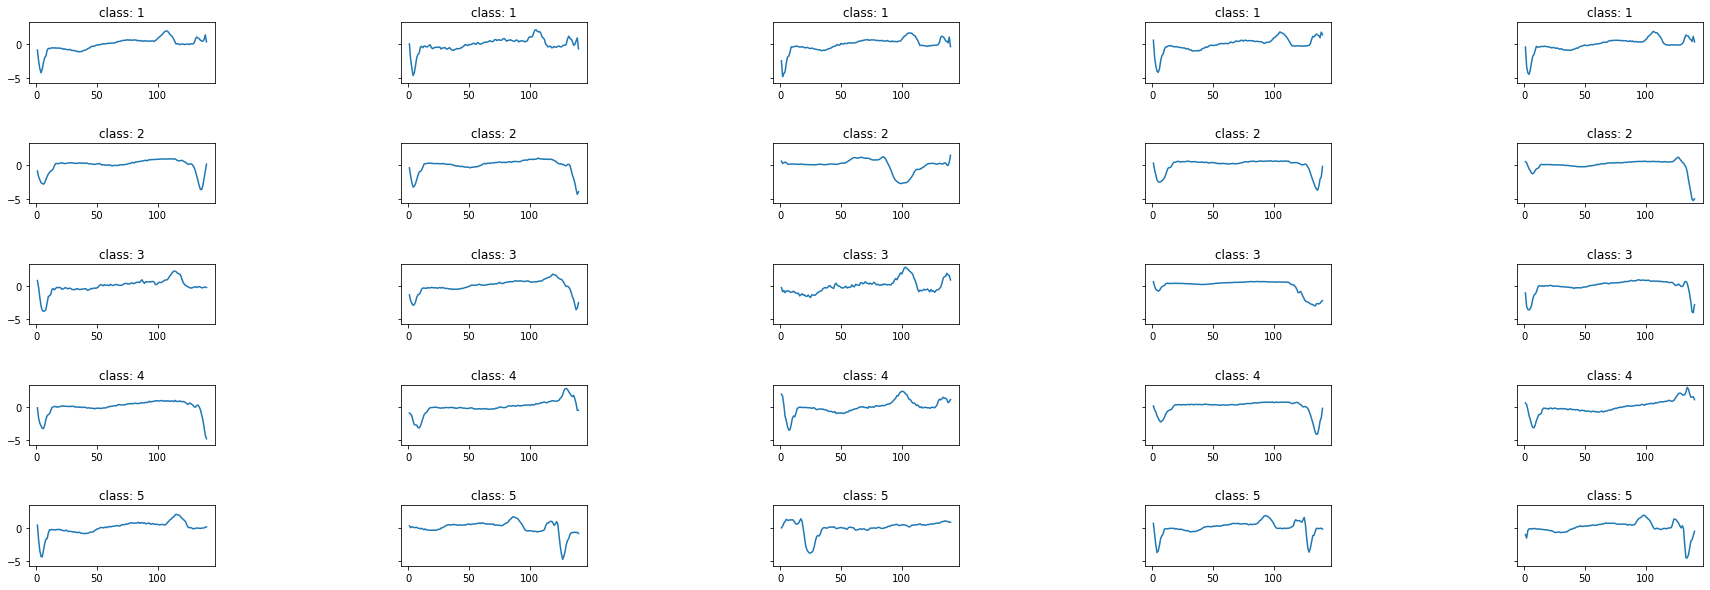

In [5]:
fig, ax = plt.subplots(5,5,figsize=[30,10],sharey=True)

# サブプロット間の間隔を調整
plt.subplots_adjust(wspace=1, hspace=1)

ax_f = ax.flatten()

#class1～５のプロット
df_train = pd.DataFrame(data_train)

cnt = 0
for class_i in range(1,6):
  df_train_plot = df_train[df_train[0] == class_i]
  for i in range(0,5):
      ax_f[cnt].set_title("class: {}".format(class_i))
      ax_f[cnt].plot(df_train_plot.iloc[i][1:])
      cnt += 1
